# AOS 51, Spring 2018, Lab #9

Last week, we learned about netCDF files and how to manipulate them using xarray. 

This week, we'll learn a few more advanced tecniques in xarray and then learn how to create high-quality maps in Python using cartopy. 

---

Let's import xarray, matplotlib, and cartopy's crs (coordinate reference system) and feature modules:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Today, we'll work with "dswrf_1998_2017_sfc_mon_mean.nc", global monthly-mean downward solar radiation flux from 1998-2017 from the NCEP-DOE 2 Reanalysis. 

In [2]:
ds = xr.open_dataset('/Users/nberg/AOS51/data/dswrf_1998_2017_sfc_mon_mean.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 240)
Coordinates:
  * lat        (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Dimensions without coordinates: nbnds
Data variables:
    dswrf      (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:               CF-1.0
    title:                     Monthly NCEP/DOE Reanalysis 2
    history:                   Sat May 19 14:26:48 2018: ncpdq -a -lat dswrf_...
    comments:                  Data is from \nNCEP/DOE AMIP-II Reanalysis (Re...
    platform:                  Model
    source:                    NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:               National Centers for Environmental Prediction
    dataset_title:             NCEP-DOE AMIP-II Reanalysis
    References:      

In [3]:
# Extract the variable and call is "sw"
sw = ds['dswrf']
sw

<xarray.DataArray 'dswrf' (time: 240, lat: 94, lon: 192)>
[4331520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Attributes:
    long_name:             Monthly Mean of Downward Solar Radiation Flux at S...
    valid_range:           [-32765 -17166]
    unpacked_valid_range:  [ -190.  1370.]
    actual_range:          [   0.          462.15484619]
    units:                 W/m^2
    precision:             1
    GRIB_id:               204
    GRIB_name:             DSWRF
    var_desc:              Downward Solar Radiation Flux
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Obs
    standard_name:         surface_downward_solar_radiati

# Resampling

Just as we did for Pandas Dataframes, we can resample xarray Datasets.

In [8]:
# Resample monthly to annual data and compute annual-means
sw.resample(time='AS').mean(dim='time')

<xarray.DataArray 'dswrf' (time: 20, lat: 94, lon: 192)>
array([[[ 131.191605,  131.274963, ...,  131.058289,  131.116638],
        [ 131.583298,  131.72496 , ...,  131.266617,  131.458298],
        ..., 
        [ 112.866661,  112.808311, ...,  112.92495 ,  112.874962],
        [ 109.808289,  109.883324, ...,  109.866638,  109.866638]],

       [[ 132.44165 ,  132.491638, ...,  132.333298,  132.383301],
        [ 132.741623,  132.841614, ...,  132.508286,  132.624954],
        ..., 
        [ 109.466591,  109.541626, ...,  109.4916  ,  109.508278],
        [ 110.116638,  109.991638, ...,  110.041649,  110.066628]],

       ..., 
       [[ 131.958313,  131.991653, ...,  131.858292,  131.90831 ],
        [ 132.924942,  133.049942, ...,  132.641647,  132.791611],
        ..., 
        [ 111.799988,  111.724976, ...,  111.933289,  111.858315],
        [ 109.049988,  109.008324, ...,  109.074951,  109.066612]],

       [[ 132.041641,  132.074997, ...,  131.94165 ,  131.983292],
        [ 1

# Groupby 

Additionally, xarray has a special command called [Groupby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html) that can quickly create annual and seasonal averages (or min, max, median, standard deviation, etc.)...and many other types of averages.

The seasons are defined as DJF, MAM, JJA, SON. 

In [5]:
# Annual means
# Note the *new dimension* called year (came from the old time dimension)
sw.groupby('time.year').mean(dim='time')

<xarray.DataArray 'dswrf' (year: 20, lat: 94, lon: 192)>
array([[[ 131.191605,  131.274963, ...,  131.058289,  131.116638],
        [ 131.583298,  131.72496 , ...,  131.266617,  131.458298],
        ..., 
        [ 112.866661,  112.808311, ...,  112.92495 ,  112.874962],
        [ 109.808289,  109.883324, ...,  109.866638,  109.866638]],

       [[ 132.44165 ,  132.491638, ...,  132.333298,  132.383301],
        [ 132.741623,  132.841614, ...,  132.508286,  132.624954],
        ..., 
        [ 109.466591,  109.541626, ...,  109.4916  ,  109.508278],
        [ 110.116638,  109.991638, ...,  110.041649,  110.066628]],

       ..., 
       [[ 131.958313,  131.991653, ...,  131.858292,  131.90831 ],
        [ 132.924942,  133.049942, ...,  132.641647,  132.791611],
        ..., 
        [ 111.799988,  111.724976, ...,  111.933289,  111.858315],
        [ 109.049988,  109.008324, ...,  109.074951,  109.066612]],

       [[ 132.041641,  132.074997, ...,  131.94165 ,  131.983292],
        [ 1

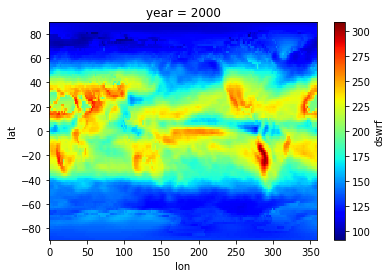

In [6]:
# Select one year and plot it
sw.groupby('time.year').mean(dim='time').sel(year=2000).plot(cmap='jet')

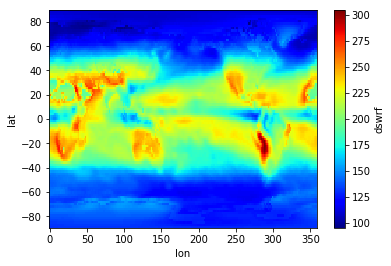

In [7]:
# Select last five years, take the average, then plot it
sw.groupby('time.year').mean(dim='time').sel(year=slice(2013,2017)).mean(dim='year').plot(cmap='jet')

In [8]:
# Seasonal means
# Note the *new dimension* called season (came from old dimension of time)
sw.groupby('time.season').mean(dim='time')

<xarray.DataArray 'dswrf' (season: 4, lat: 94, lon: 192)>
array([[[  3.512983e+02,   3.514116e+02, ...,   3.510583e+02,   3.511717e+02],
        [  3.499966e+02,   3.502949e+02, ...,   3.493716e+02,   3.497082e+02],
        ..., 
        [  1.997070e-02,   1.997070e-02, ...,   1.997070e-02,   1.997070e-02],
        [  1.997070e-02,   1.997070e-02, ...,   1.997070e-02,   1.997070e-02]],

       [[  2.163493e-02,   2.163493e-02, ...,   2.163493e-02,   2.163493e-02],
        [  2.163493e-02,   2.163493e-02, ...,   2.163493e-02,   2.163493e-02],
        ..., 
        [  2.789999e+02,   2.787700e+02, ...,   2.794999e+02,   2.792366e+02],
        [  2.753799e+02,   2.752182e+02, ...,   2.754883e+02,   2.754682e+02]],

       [[  1.059996e+01,   1.060663e+01, ...,   1.058829e+01,   1.058995e+01],
        [  1.183496e+01,   1.185162e+01, ...,   1.179497e+01,   1.181163e+01],
        ..., 
        [  1.525833e+02,   1.525549e+02, ...,   1.525699e+02,   1.524916e+02],
        [  1.501832e+02,   

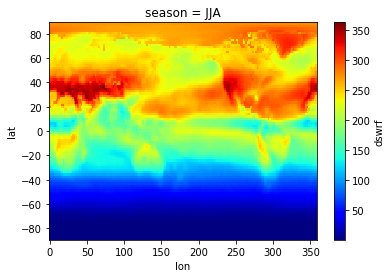

In [9]:
# Select one season and plot it
sw.groupby('time.season').mean(dim='time').sel(season='JJA').plot(cmap='jet')

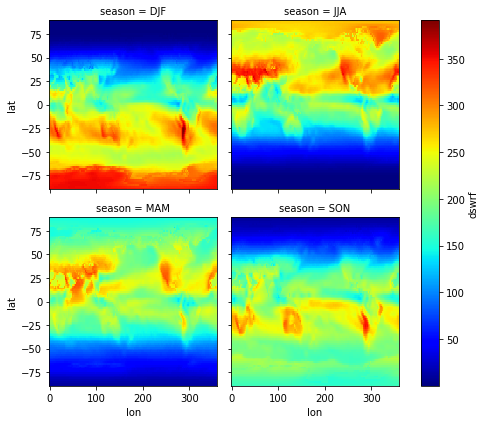

In [10]:
# Add some column arguments to the plot() command to show all 4 seasons
sw.groupby('time.season').mean(dim='time').plot(cmap='jet', col='season', col_wrap=2)

---
**In-class exercise**

1. Plot 2000-2005 average incoming SW radiation. 
2. Plot seasonal-average incoming SW radiation over CONUS (roughly a box spanning 25-50 degrees N, 235-300 degrees E).
---

# Cartopy

Enough with these simpe xarray maps, it's time to create high quality maps using [cartopy](https://scitools.org.uk/cartopy/).

Cartopy is an interface to create maps on top of matplotlib. We just need to define the [map projection](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#cartopy-projections) as a new axes, add the climate data of interest, add coastlines, and specify customizations to the figure!

### Simple, beautiful maps

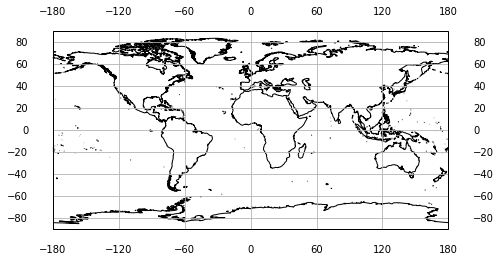

In [101]:
# Most basic map: no data, just display the PlateCarree projection 
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m') #can be 110, 50, or 10m resolution; can also specify the color 
ax.gridlines(draw_labels=True)

### Global to local: change the spatial extents

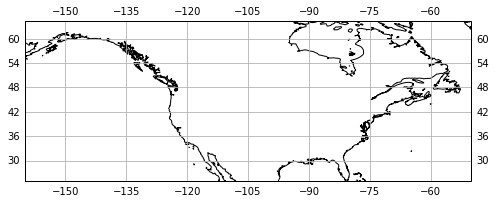

In [102]:
# Adjusting the extent with set_extent[x0,x1,y0,y1]
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([200,310,25,50])
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

### Add state and province outlines

**NAOMI:** why aren't all the states/province lines touching?

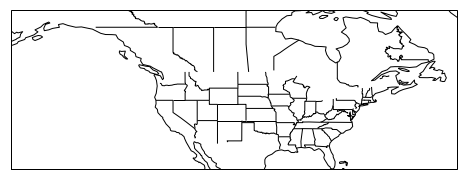

In [68]:
# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(states_provinces, edgecolor='black')
ax.set_extent([200,310,25,50])
ax.coastlines()
#ax.gridlines()

### Contouring and filling data over the map (contourf)

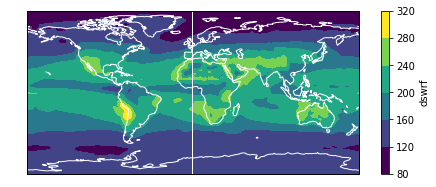

In [105]:
# Climatological shortwave radiation
clim_sw = sw.mean(dim='time')

plt.figure(figsize=(8,3))
ax = plt.axes(projection=ccrs.PlateCarree())
clim_sw.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
ax.coastlines(color='white')
#clim_sw.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())
#ax.coastlines(color='white')

### Grid-cell colormesh over the map (pcolormesh)

Text(0.5,1,'Shortwave Radiation (W/m2)')

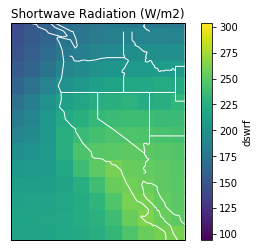

In [111]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
clim_sw.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(color='white')
ax.set_extent([230,250,25,50])
ax.add_feature(states_provinces, edgecolor='white')
ax.set_title('Shortwave Radiation (W/m2)')

### Multi-panel maps

**NAOMI**: how can we get a single colorbar for multi-panel maps? 

std::bad_cast
std::bad_cast
std::bad_cast


Text(0.5,1,'SON')

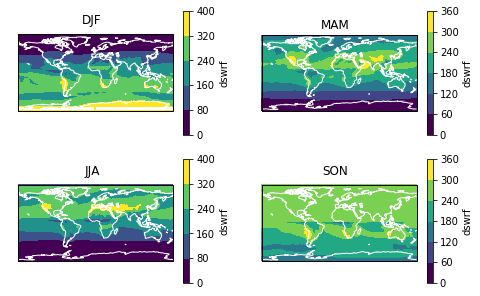

In [113]:
# Seasonal-mean shortwave
seasonal_means = sw.groupby('time.season').mean(dim='time') #.sel(season='JJA').

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())
seasonal_means.sel(season='DJF').plot.contourf(ax=ax1, transform=ccrs.PlateCarree())
ax1.coastlines(color='white')
ax1.set_title('DJF')

ax2 = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
seasonal_means.sel(season='MAM').plot.contourf(ax=ax2, transform=ccrs.PlateCarree())
ax2.coastlines(color='white')
ax2.set_title('MAM')

ax3 = fig.add_subplot(2,2,3, projection=ccrs.PlateCarree())
seasonal_means.sel(season='JJA').plot.contourf(ax=ax3, transform=ccrs.PlateCarree())
ax3.coastlines(color='white')
ax3.set_title('JJA')

ax4 = fig.add_subplot(2,2,4, projection=ccrs.PlateCarree())
seasonal_means.sel(season='SON').plot.contourf(ax=ax4, transform=ccrs.PlateCarree())
ax4.coastlines(color='white')
ax4.set_title('SON')


Text(0.5,1,'2017 Shortwave Radiation (W/m2)')

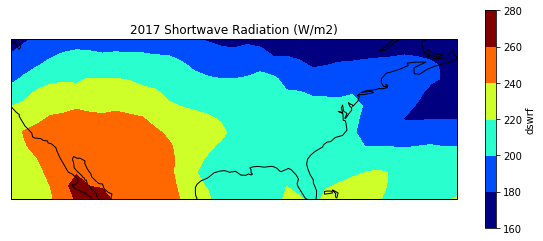

In [39]:
annual_mean_2017 = sw.groupby('time.year').mean(dim='time').sel(year=2017).sel(lat=slice(25,50), lon=slice(235,300))

fig = plt.figure(figsize=(10,4))
ax = plt.axes(projection=ccrs.PlateCarree())
annual_mean_2017.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines()
ax.set_title('2017 Shortwave Radiation (W/m2)')